# Assignment #5

## Due: November 12, 2020

Read in the [Volcano eruptions](https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv) data from the TidyTuesday project with `read_csv`.

Use the `print` function to find the number of rows and columns in the data.

In [1]:
library('tidyverse')

df_volcano = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv')

df_volcano %>% print

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  volcano_number = col_double(),
  volcano_name = col_character(),
  eruption_number = col_double(),
  eruption_category = col_character(),
  area_of_activity = col_character(),
  vei = col_double(),
  start_year = col_double(),
  start_month = col_double(),
  start_day = col_double(),
  evidence_method_dating = col_character(),
  end_year = col_double(),
  end_month = col_double(),
  end_day = col_double(),
  latitude = col_double(),
  longitude = col_double()
)




# A tibble: 11,178 x 15
   volcano_number volcano_name eruption_number eruption_catego… area_of_activity
            <dbl> <chr>                  <dbl> <chr>            <chr>           
 1         266030 Soputan                22354 Confirmed Erupt… NA              
 2         343100 San Miguel             22355 Confirmed Erupt… NA              
 3         233020 Fournaise, …           22343 Confirmed Erupt… NA              
 4         345020 Rincon de l…           22346 Confirmed Erupt… NA              
 5         353010 Fernandina             22347 Confirmed Erupt… NA              
 6         273070 Taal                   22344 Confirmed Erupt… NA              
 7         282050 Kuchinoerab…           22345 Confirmed Erupt… NA              
 8         241040 Whakaari/Wh…           22338 Confirmed Erupt… 1978/90 Crater …
 9         311060 Semisopochn…           22341 Confirmed Erupt… NA              
10         284096 Nishinoshima           22340 Confirmed Erupt… NA              
# … 

Using `group_by`, `summarize` (or `count`), and `arrange`, find the volcano with the most recorded eruptions in the data. Remeber the [desc](https://dplyr.tidyverse.org/reference/desc.html) function can be used to sort in descending order.

In [2]:
df_volcano %>% 
        group_by(volcano_name) %>%
        count(volcano_name) %>%
        arrange(-n) %>%
        print

# Volcano Etna has the most recorded eruptions

# A tibble: 921 x 2
# Groups:   volcano_name [921]
   volcano_name               n
   <chr>                  <int>
 1 Etna                     241
 2 Fournaise, Piton de la   194
 3 Asosan                   186
 4 Villarrica               164
 5 Asamayama                147
 6 Katla                    132
 7 Klyuchevskoy             111
 8 Mauna Loa                110
 9 Merapi                   110
10 Izu-Oshima               108
# … with 911 more rows


Using `filter` and `arrange`, what is the year of the most recent eruption for the volcano above (i.e. the volcano with the most recorded eruptions in the data)? 

In [3]:
df_volcano %>% 
        select(volcano_name, start_year, end_year) %>%
        filter(volcano_name == "Etna") %>%
        arrange(-start_year) %>%
        print

#The most recent eruption for Etna started in 2013 and ended in 2020

# A tibble: 241 x 3
   volcano_name start_year end_year
   <chr>             <dbl>    <dbl>
 1 Etna               2013     2020
 2 Etna               2010     2013
 3 Etna               2010     2010
 4 Etna               2008     2009
 5 Etna               2007     2008
 6 Etna               2006     2006
 7 Etna               2005     2005
 8 Etna               2004     2005
 9 Etna               2004     2004
10 Etna               2003     2003
# … with 231 more rows


Make a bar chart of eruption count by volcano_name. The bars should be sorted by frequency using `fct_infreq`. "Lump" the low frequency values into an "Other" category with `fct_lump`.

**Bonus:**  Can you remove the "Other" category with the filter function if it dominates the chart?

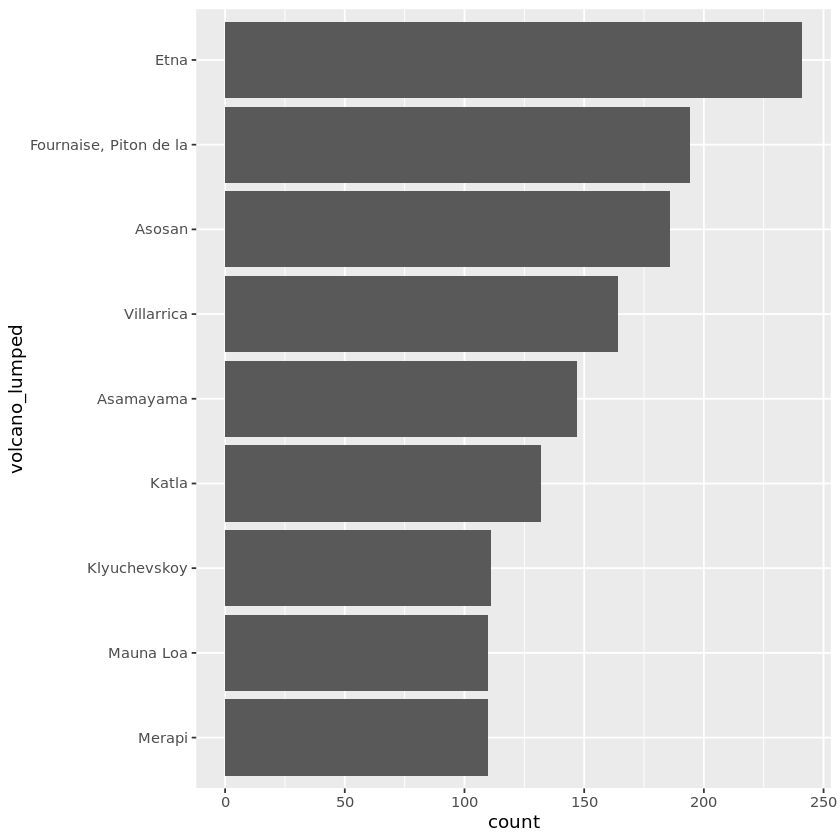

In [8]:
df_eruption = df_volcano %>%
            mutate(volcano_lumped = volcano_name %>% fct_lump(n=8) %>% fct_infreq() %>% fct_rev) %>% 
            filter(volcano_lumped != "Other")

p = ggplot(df_eruption, aes(y = volcano_lumped))

p = p + geom_bar()

p

Using `mutate` generate a column that represents the span of each eruption in years (i.e. "end_year" minus "start_year"). Use `filter` to exclude eruption spans shorter than ten years. 

- Plot a histogram of your generated column (i.e. eruption spans greater than ten years).
- Which volcano(s) has/have the longest eruption span in years? How long did the eruption last?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



# A tibble: 94 x 2
   volcano_name  span
   <chr>        <dbl>
 1 Stromboli      299
 2 Fogo           261
 3 Yasur          246
 4 Sangay         188
 5 Santa Maria     98
 6 Dukono          87
 7 Stromboli       86
 8 Sangay          77
 9 Kilauea         71
10 Galeras         66
# … with 84 more rows


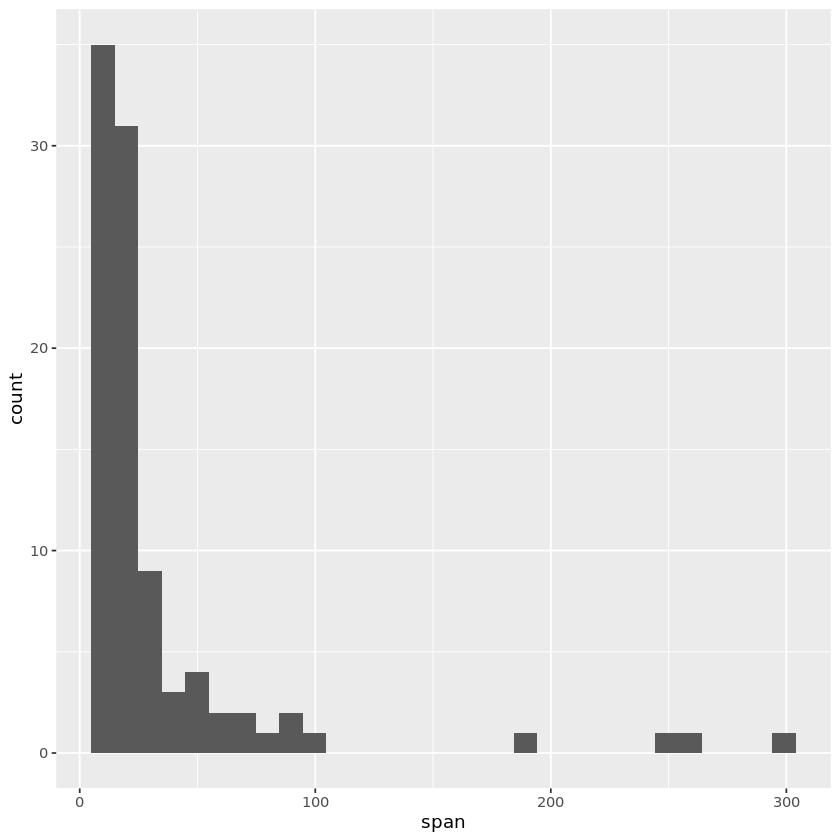

In [5]:
df_span = df_volcano %>%
          mutate(span = end_year - start_year) %>%
          filter(span >= 10)

p = ggplot(df_span, aes(x=span))

p = p + geom_histogram()

p

df_span %>% 
        select(volcano_name, span) %>%
        arrange(-span) %>%
        print
#Stromboli and fogo have the longest spans with 299 adn 261 years respectively